In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
grid_emissions = pd.read_excel('Dataset/grid-emissions-summary/LAEI2013_Emissions_Summary-PM10_v1.1.xlsx', sheet_name='PM10 by Grid Exact Cut', header=3)
print(grid_emissions.head())

   Year  LAEI 1km2 ID  GRID_ExactCut_ID  Easting  Northing Borough    Zone  \
0  2008          5910                 1   510500    203500  NonGLA  NonGLA   
1  2008          5911                 2   511500    203500  NonGLA  NonGLA   
2  2008          5912                 3   512500    203500  NonGLA  NonGLA   
3  2008          5915                 4   515500    203500  NonGLA  NonGLA   
4  2008          5916                 5   516500    203500  NonGLA  NonGLA   

   Household and Garden  Small Waste and Accidental Fires  Agriculture  ...  \
0              0.000087                          0.006183     0.022796  ...   
1              0.000278                          0.017851     0.020652  ...   
2              0.000174                          0.017042     0.024093  ...   
3              0.000260                          0.017204     0.024055  ...   
4              0.000226                          0.012579     0.028377  ...   

   Non-TfL Bus and Coach_Exhaust  Non-TfL Bus and Coach_

In [3]:
concentrations = pd.read_csv('Dataset/concentrations-data/laei_LAEI2019_2025_Base_Final_CorNOx15_PM10m.csv')
print(concentrations.head())

        x       y      conc
0  519100  203440  14.48321
1  519120  203440  15.45412
2  519140  203440  17.53899
3  519160  203440  16.30368
4  519180  203440  15.10603


In [4]:
# concentrations 데이터 확인 및 필요 열 선택
print(grid_emissions.head())

grid_emissions_cleaned = grid_emissions[['Year', 'Easting', 'Northing', 'Household and Garden', 'Agriculture']]

# 결측치 처리 (예: 결측치를 0으로 대체)
grid_emissions_cleaned.fillna(0, inplace=True)

   Year  LAEI 1km2 ID  GRID_ExactCut_ID  Easting  Northing Borough    Zone  \
0  2008          5910                 1   510500    203500  NonGLA  NonGLA   
1  2008          5911                 2   511500    203500  NonGLA  NonGLA   
2  2008          5912                 3   512500    203500  NonGLA  NonGLA   
3  2008          5915                 4   515500    203500  NonGLA  NonGLA   
4  2008          5916                 5   516500    203500  NonGLA  NonGLA   

   Household and Garden  Small Waste and Accidental Fires  Agriculture  ...  \
0              0.000087                          0.006183     0.022796  ...   
1              0.000278                          0.017851     0.020652  ...   
2              0.000174                          0.017042     0.024093  ...   
3              0.000260                          0.017204     0.024055  ...   
4              0.000226                          0.012579     0.028377  ...   

   Non-TfL Bus and Coach_Exhaust  Non-TfL Bus and Coach_

/tmp/ipykernel_180331/2876842641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grid_emissions_cleaned.fillna(0, inplace=True)


In [5]:
print(concentrations.head())

concentrations_cleaned = concentrations[['x', 'y', 'conc']]

concentrations_cleaned.rename(columns={'x': 'Easting', 'y': 'Northing'}, inplace=True)

        x       y      conc
0  519100  203440  14.48321
1  519120  203440  15.45412
2  519140  203440  17.53899
3  519160  203440  16.30368
4  519180  203440  15.10603


In [6]:
merged_data = pd.merge(grid_emissions_cleaned, concentrations_cleaned, on=['Easting', 'Northing'], how='inner')

print(merged_data.head())

   Year  Easting  Northing  Household and Garden  Agriculture      conc
0  2008   509500    202500              0.000729     0.017540  12.15564
1  2008   510500    202500              0.000052     0.027853  11.99961
2  2008   511500    202500              0.000104     0.026385  12.00740
3  2008   512500    202500              0.001007     0.009546  12.32532
4  2008   513500    202500              0.000538     0.010494  12.71153


In [7]:
y = merged_data['conc']

X = merged_data[['Household and Garden', 'Agriculture']]

print(X.head(), y.head())

   Household and Garden  Agriculture
0              0.000729     0.017540
1              0.000052     0.027853
2              0.000104     0.026385
3              0.001007     0.009546
4              0.000538     0.010494 0    12.15564
1    11.99961
2    12.00740
3    12.32532
4    12.71153
Name: conc, dtype: float64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(15408, 2) (3852, 2)


In [9]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [10]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

In [11]:
tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

In [12]:
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

In [13]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [22]:
scaler = StandardScaler()

nn_model = MLPRegressor(hidden_layer_sizes=(100, 50),  # 은닉층 2개, 각 층에 100, 50개의 뉴런
                        activation='relu',             # 활성화 함수는 ReLU
                        solver='adam',                 # Adam 최적화 알고리즘 사용
                        max_iter=1000,                 # 최대 1000번의 반복
                        random_state=42)

nn_pipeline = make_pipeline(scaler, nn_model)

nn_pipeline.fit(X_train, y_train)

y_pred_nn = nn_pipeline.predict(X_test)

In [29]:
def get_result(model_name, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    threshold = 0.10  
    accuracy = np.mean(np.abs((y_test - y_pred) / y_test) < threshold)

    return mae, mse, rmse, r2, accuracy

In [30]:
mae_rf, mse_rf, rmse_rf, r2_rf, accuracy_rf = get_result('Random Forest', y_test, y_pred_rf)
mae_linear, mse_linear, rmse_linear, r2_linear, accuracy_linear = get_result('Linear Regression', y_test, y_pred_linear)
mae_tree, mse_tree, rmse_tree, r2_tree, accuracy_tree = get_result('Decision Tree Regressor', y_test, y_pred_tree)
mae_gbr, mse_gbr, rmse_gbr, r2_gbr, accuracy_gbr = get_result('Gradient Boosting Regressor', y_test, y_pred_gbr)
mae_xgb, mse_xgb, rmse_xgb, r2_xgb, accuracy_xgb = get_result('XGBoost', y_test, y_pred_xgb)
mae_nn, mse_nn, rmse_nn, r2_nn, accuracy_nn = get_result('Neural Network Regressor', y_test, y_pred_nn)

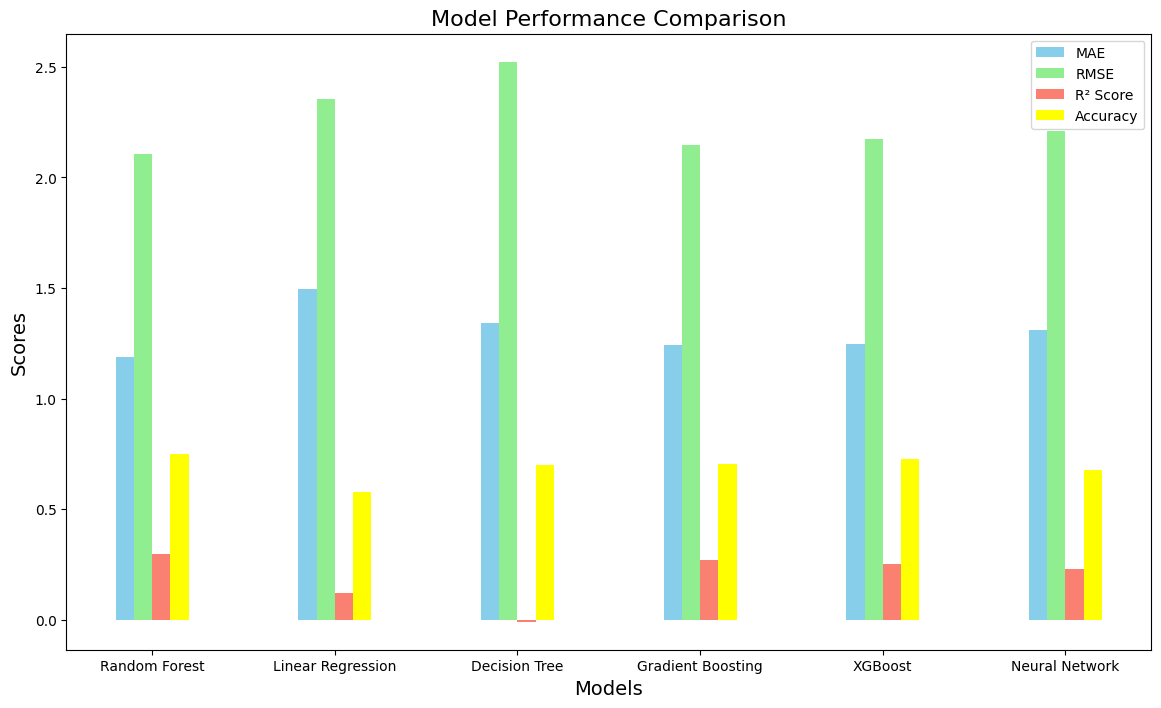

In [44]:
models = ['Random Forest', 'Linear Regression', 'Decision Tree', 'Gradient Boosting', 'XGBoost', 'Neural Network']

mae_values = [mae_rf, mae_linear, mae_tree, mae_gbr, mae_xgb, mae_nn]
rmse_values = [rmse_rf, rmse_linear, rmse_tree, rmse_gbr, rmse_xgb, rmse_nn]
r2_values = [r2_rf, r2_linear, r2_tree, r2_gbr, r2_xgb, r2_nn]
accuracy_values = [accuracy_rf * 1, accuracy_linear * 1, accuracy_tree * 1, accuracy_gbr * 1, accuracy_xgb * 1, accuracy_nn * 1]

x = np.arange(len(models))
width = 0.1  

plt.figure(figsize=(14, 8))

plt.bar(x - width*1.5, mae_values, width, label='MAE', color='skyblue')
plt.bar(x - width*0.5, rmse_values, width, label='RMSE', color='lightgreen')
plt.bar(x + width*0.5, r2_values, width, label='R² Score', color='salmon')
plt.bar(x + width*1.5, accuracy_values, width, label='Accuracy', color='yellow')

plt.xticks(x, models)

plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)

plt.legend()

plt.show()